In [83]:
#loading the modules
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import os
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import datetime
import requests

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
#fetching the data from the website
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
req = requests.get(url)
csv_file = open('covid_2019.csv', 'wb')
url_content = req.content
csv_file.write(url_content)
csv_file.close()


In [84]:
#If i only want to read the data instead of download everytime.
covid = pd.read_csv('covid_2019.csv')

In [85]:
#Let's do what I call the '3s' .head(), info(), and describe(). This gives us a high overview of the data that we're looking at.
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
1,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
2,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
3,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159
4,14/09/2020,14,9,2020,75,0,Afghanistan,AF,AFG,38041757.0,Asia,1.456294


In [86]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43509 entries, 0 to 43508
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     43509 non-null  object 
 1   day                                                         43509 non-null  int64  
 2   month                                                       43509 non-null  int64  
 3   year                                                        43509 non-null  int64  
 4   cases                                                       43509 non-null  int64  
 5   deaths                                                      43509 non-null  int64  
 6   countriesAndTerritories                                     43509 non-null  object 
 7   geoId                                                       43321 non-null  object 
 

In [87]:
#Lets drop the null values
covid.dropna()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
1,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
2,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
3,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159
4,14/09/2020,14,9,2020,75,0,Afghanistan,AF,AFG,38041757.0,Asia,1.456294
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,07/04/2020,7,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
43492,06/04/2020,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
43493,05/04/2020,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796
43494,04/04/2020,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624


In [88]:
#Assign category type for year/mo/day
covid['year'] = covid['year'].astype('category')
covid['month'] = covid['month'].astype('category')
covid['day'] = covid['day'].astype('category')

In [89]:
covid.describe()

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,43509.000000,43509.000000,4.344500e+04,40728.000000
mean,694.442437,21.757912,4.290025e+07,32.839410
std,4327.614089,126.460614,1.579461e+08,75.768250
min,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,0.000000,0.000000,1.355982e+06,0.366824
50%,9.000000,0.000000,8.519373e+06,4.535962
75%,148.000000,3.000000,2.916192e+07,26.376502
max,97894.000000,4928.000000,1.433784e+09,1058.225943


In [90]:
#Transform popData and deaths into deaths per population (per 1,000,000)
covid['deathPpop'] = covid['popData2019'] / covid['deaths'] / 1000000

In [91]:
covid['deathRate'] = covid['deaths']/ covid['cases']

In [92]:
for i, rate in covid['deathRate'].iteritems():
    if pd.isnull(rate) or rate == np.inf:
        covid['deathRate'].iloc[i] = 0

C:\Users\joshu\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [93]:
#Check that we have the correct values 0..1
covid['deathRate'].unique()

array([0.        , 0.25      , 0.06060606, ..., 0.24390244, 0.23636364,
       0.03396226])

In [96]:
#confirm nan and inf values are replaced. (I know there are other ways to do this)
covid['deathRate'].iloc[43505]

0.0

In [97]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,deathPpop,deathRate
0,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155,inf,0.000000
1,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446,inf,0.000000
2,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649,3.804176,0.250000
3,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159,6.340293,0.060606
4,14/09/2020,14,9,2020,75,0,Afghanistan,AF,AFG,38041757.0,Asia,1.456294,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43504,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,inf,0.000000
43505,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,14.645473,0.000000
43506,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,inf,0.000000
43507,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,inf,0.000000


In [84]:
covid = covid.reset_index()

In [99]:
#Scale deaths 0..1
scaler = MinMaxScaler()

In [100]:
rescaled_covid = scaler.fit_transform(covid[['deaths']])

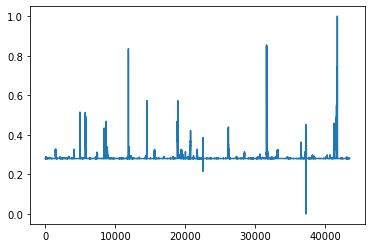

In [101]:
plt.plot(rescaled_covid)

In [102]:
#Add scaled_deaths to the dataframe
covid['scaled_deaths'] = rescaled_covid

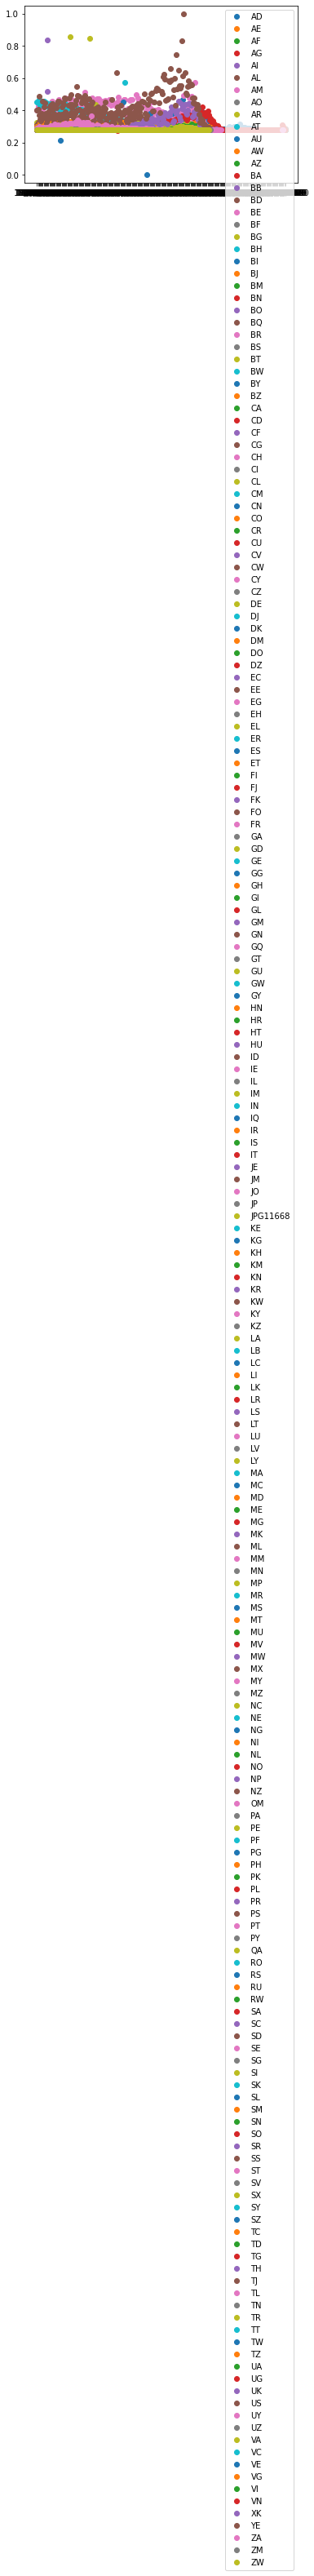

In [103]:
#I know this is going to be convaluted due to the number of countries, but color will really help us understand the scatter plot better.
groups = covid.groupby('geoId')
for name, group in groups:
    plt.plot(group['dateRep'], group['scaled_deaths'], marker='o', linestyle='', label=name)
plt.legend()

In [104]:
#It looks like we had a couple of really bad days around the globe. Specfically in Albania, with the highest death in a single day reported.

In [105]:
covid['deathPpop'] = covid['deaths']/covid['popData2019'] / 1000000

In [106]:
#Looks like we have some issues with our  deaths. Lets get rid of deaths < 0. We're also reporting negative cases.
covid = covid[covid['deaths'] >=0]
covid = covid[covid['cases'] >=0]

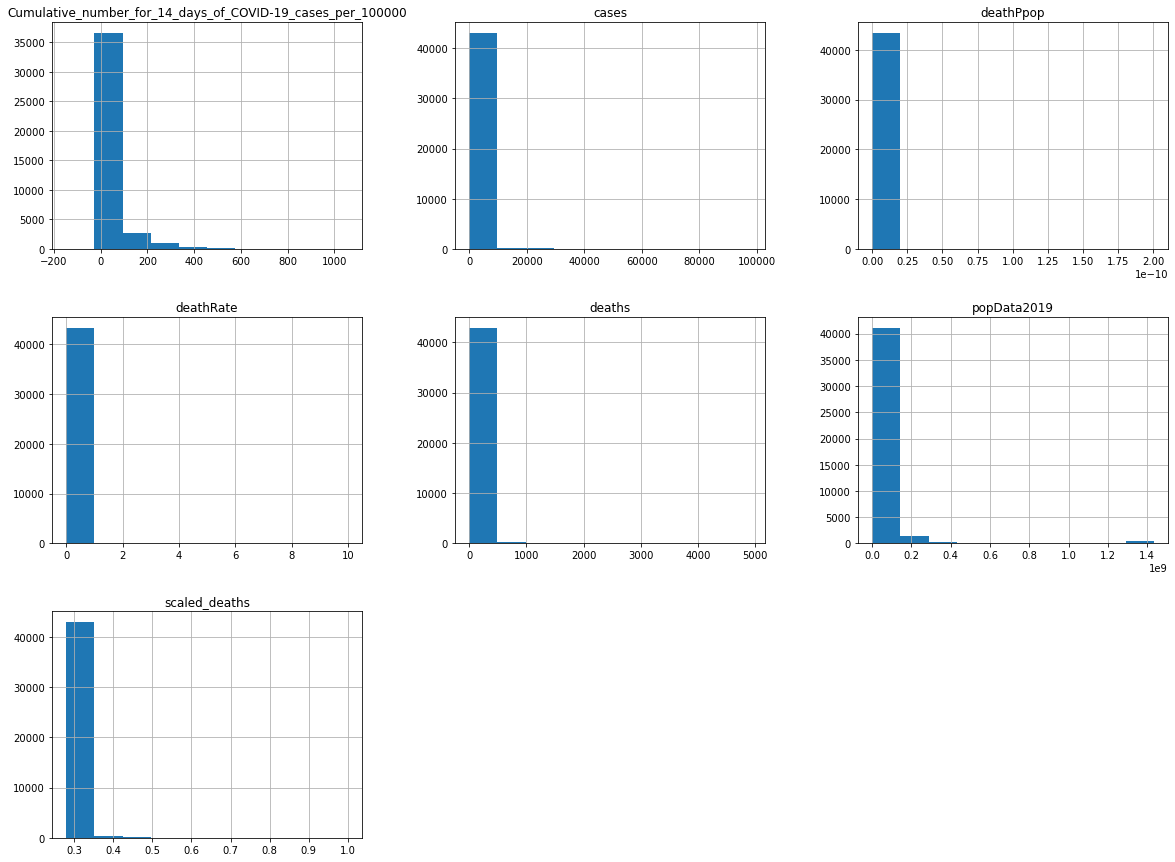

In [107]:
#Lets plot the data just to see what we've got
covid.hist(figsize=(20,15))
plt.show()

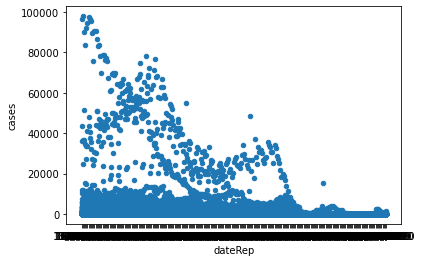

In [108]:
#It seems we have 10 Variables. day, month, and year can be considered a single variable for our purposes. Next do a few scatter plots.
#covid.plot(kind='scatter', x='cases',y='deaths')
covid.plot(kind='scatter', x='dateRep',y ='cases')
plt.show()

In [109]:
#Let's verify that the US is 'US' and not 'USA'
covid['geoId'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'KH', 'CM', 'CA', 'CV', 'JPG11668', 'KY', 'CF', 'TD', 'CL', 'CN',
       'CO', 'KM', 'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD',
       'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ',
       'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'PF', 'GA', 'GM', 'GE', 'DE',
       'GH', 'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY',
       'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM',
       'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW',
       'MY', 'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC', 'MN', 'ME',
       'MS', 'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE',
       'NG', 'MK', 'MP', 'NO', 'OM', 'PK', 'PS', 'PA

In [127]:
#Lets zoom in on the US data.
us_covid = covid[covid['geoId'] == 'US']

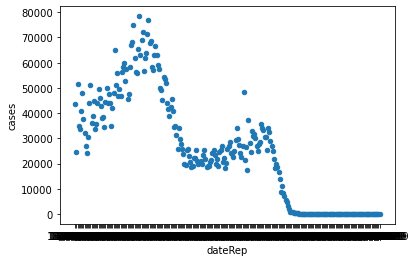

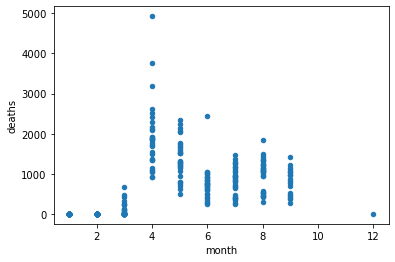

In [128]:
us_covid.plot(kind='scatter', x='dateRep',y ='cases')
us_covid.plot(kind='scatter',x='month',y='deaths')
plt.show()

In [129]:
grouped_us_covid = us_covid.groupby('month')

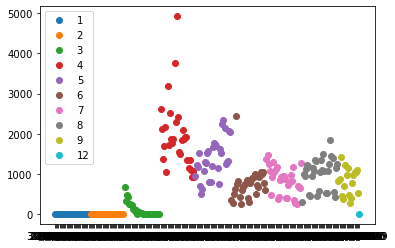

In [131]:
for name, group in grouped_us_covid:
    plt.plot(group['dateRep'], group['deaths'], marker='o', linestyle='', label=name)
plt.legend()

In [133]:
#It looks like April was by far our worse month for deaths
grouped_us_covid.agg('mean')

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,deathPpop,deathRate,scaled_deaths
month,,,,,,,
1,0.193548,0.000000,329064917.0,0.000544,0.000000e+00,0.000000,0.280164
2,2.068966,0.000000,329064917.0,0.004747,0.000000e+00,0.000000,0.280164
3,5308.193548,102.258065,329064917.0,8.872021,3.107535e-13,0.042708,0.295101
4,29176.300000,1926.533333,329064917.0,112.680593,5.854569e-12,0.067070,0.561574
5,23563.709677,1381.129032,329064917.0,105.614821,4.197132e-12,0.058129,0.481906
6,27338.933333,745.300000,329064917.0,101.567548,2.264903e-12,0.029221,0.389030
7,61434.258065,836.451613,329064917.0,236.531219,2.541905e-12,0.013460,0.402345
8,48456.419355,999.967742,329064917.0,226.902066,3.038816e-12,0.020326,0.426230
9,37627.500000,809.111111,329064917.0,167.521927,2.458819e-12,0.021328,0.398351


C:\Users\joshu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 329064917.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\joshu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 329064917.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\joshu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 329064917.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


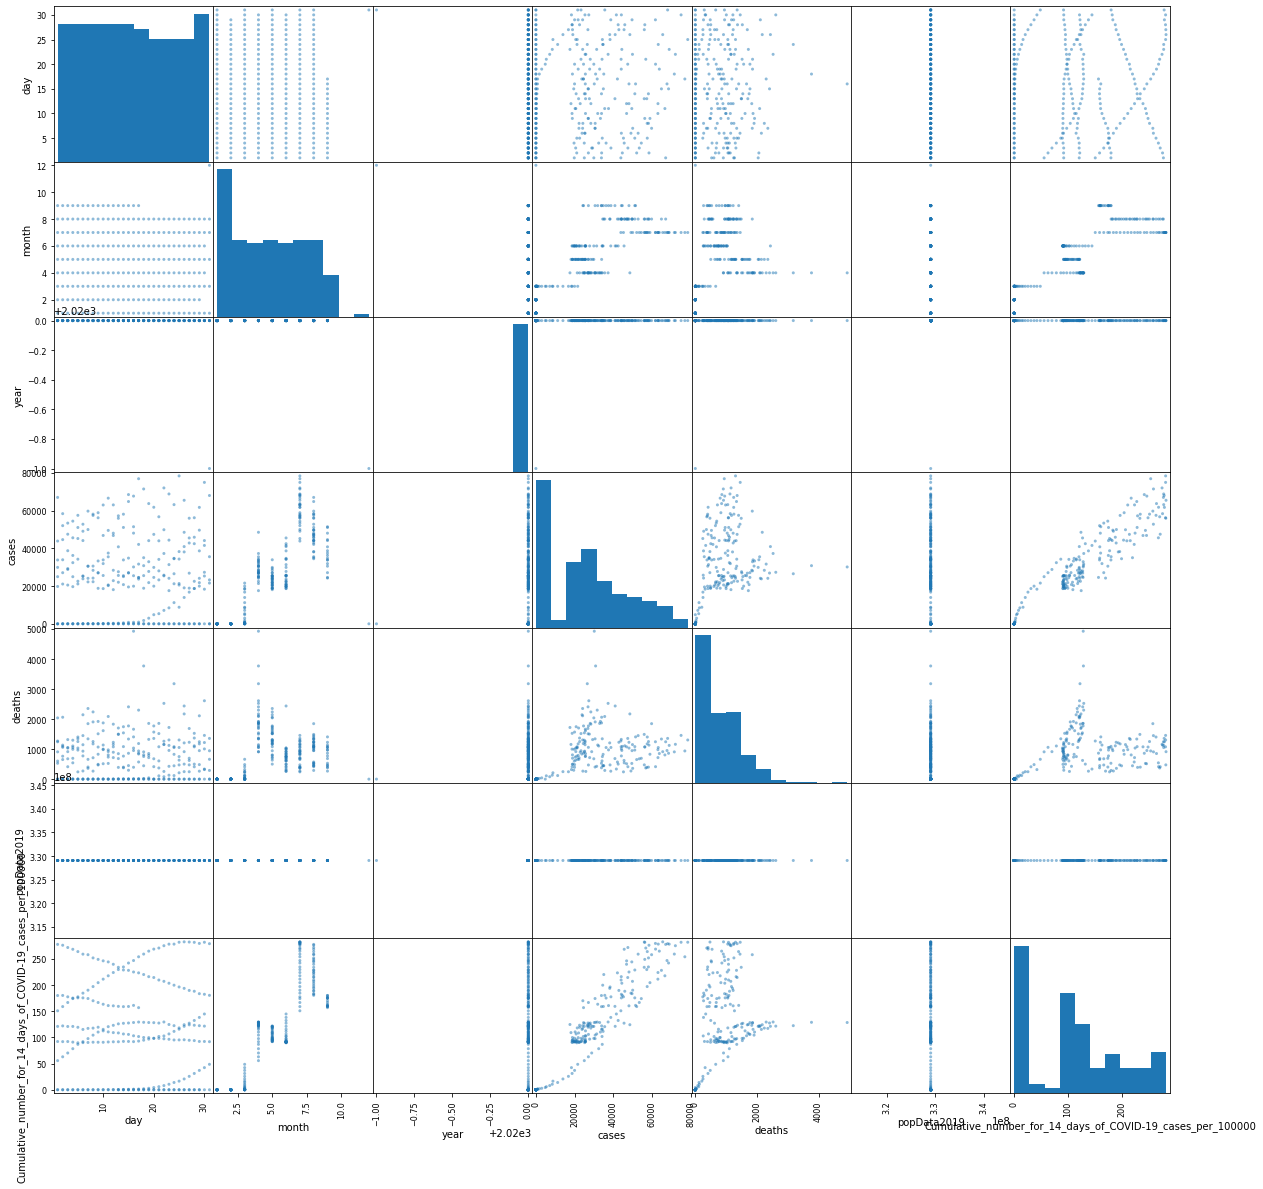

In [62]:
scatter_matrix(us_covid, figsize=(20,20))
plt.show()

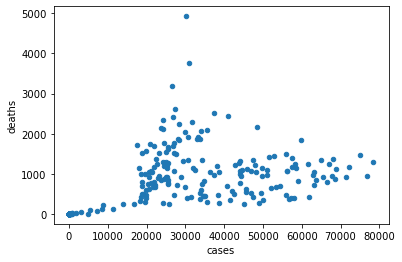

In [63]:
us_covid.plot(kind='scatter',x='cases',y='deaths')

In [126]:
us_covid

NameError: name 'us_covid' is not defined

In [53]:
covid['datetime'] = pd.to_datetime(covid['year'].astype(str) + covid['month'].astype(str) + covid['day'].astype(str), format='%Y%m%d')

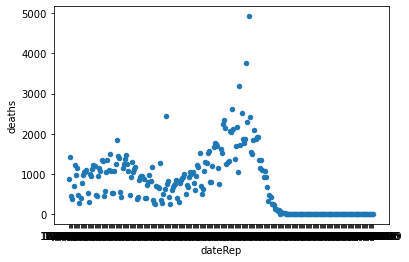

In [127]:
us_covid.plot(kind='scatter', x='dateRep',y='deaths')

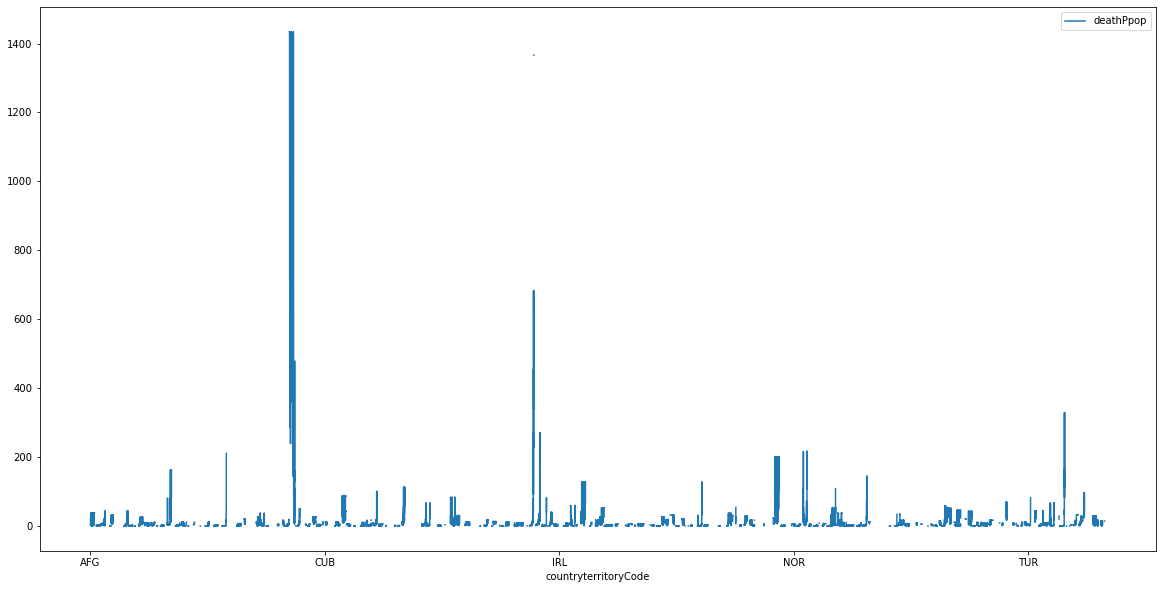

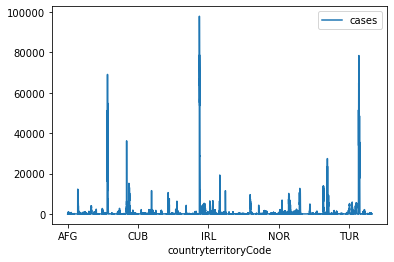

In [125]:
covid.plot(x='countryterritoryCode', y='deathPpop', figsize=(20,10))
covid.plot(x='countryterritoryCode', y='cases')

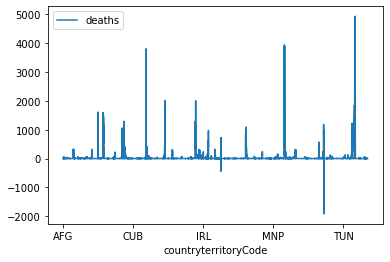

In [18]:
covid.plot(x='countryterritoryCode', y='deaths')

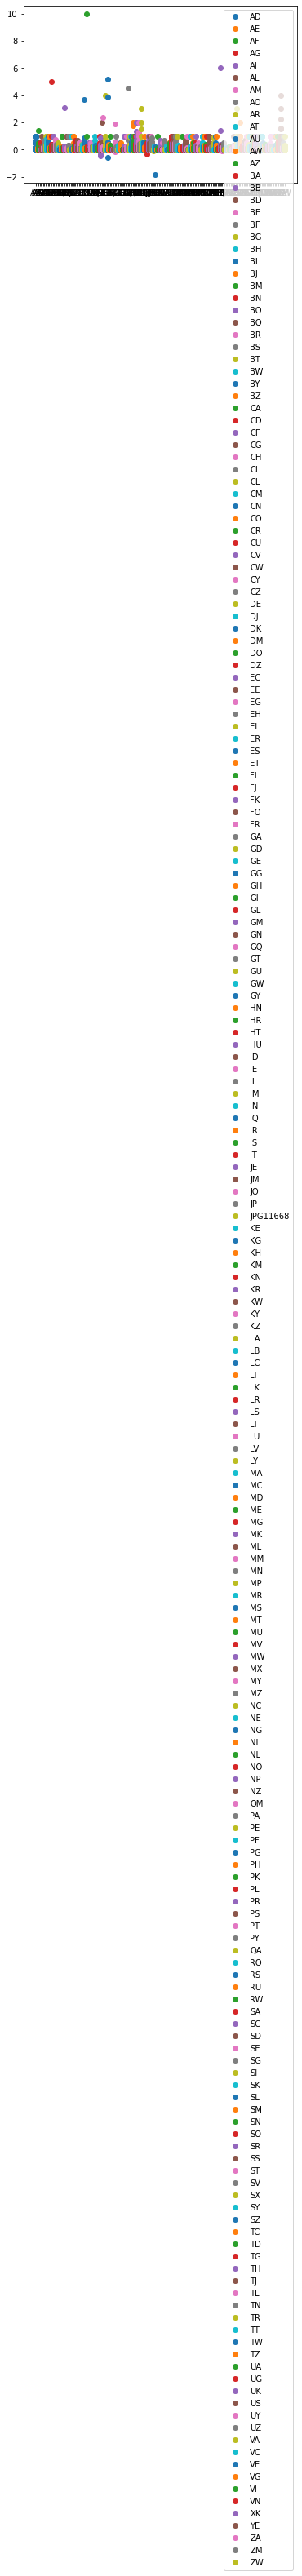

In [111]:
#Plot deathRate
for name, group in groups:
    plt.plot(group['geoId'], group['deathRate'], marker='o', linestyle='', label=name)
plt.legend()

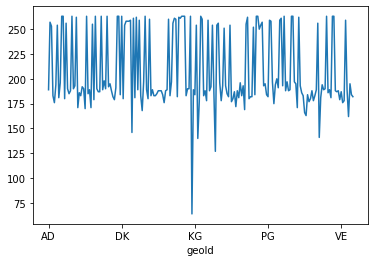

In [125]:
groups.count()['deathRate'].plot()

In [ ]:
#This is the percent of persons within a country that died that have gotten covid (deaths / cases)

# Insights
In most countries, there are between 0-2% of cases results in deaths and a handful of countries in the 6% - 2% with one extreme outlier in the 10% (AF).

In the U.S., we had a big spike of cases(80,000 in march, and we are now averaging 20,000-40,000. It's not great, but it is improvement). We're averaging 800-1000 deaths a day from covid in Q3.